=== PyTorch Convolution Filters Demo ===

Trying to load image from: https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
✓ Successfully loaded image!

1. Processing as GRAYSCALE:
Processing grayscale image...
Image size: (512, 512)
Tensor shape: torch.Size([1, 1, 512, 512])
Applying blur filter...
Applying sobel_h filter...
Applying sobel_v filter...
Applying sharpen filter...
Applying edges filter...
Applying emboss filter...
Applying gaussian filter...
Applying random_3x3 filter...
Applying random_5x5 filter...
Applying random_7x7 filter...


/tmp/ipython-input-3968601887.py:103: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return Image.fromarray((array * 255).astype(np.uint8), mode='L')


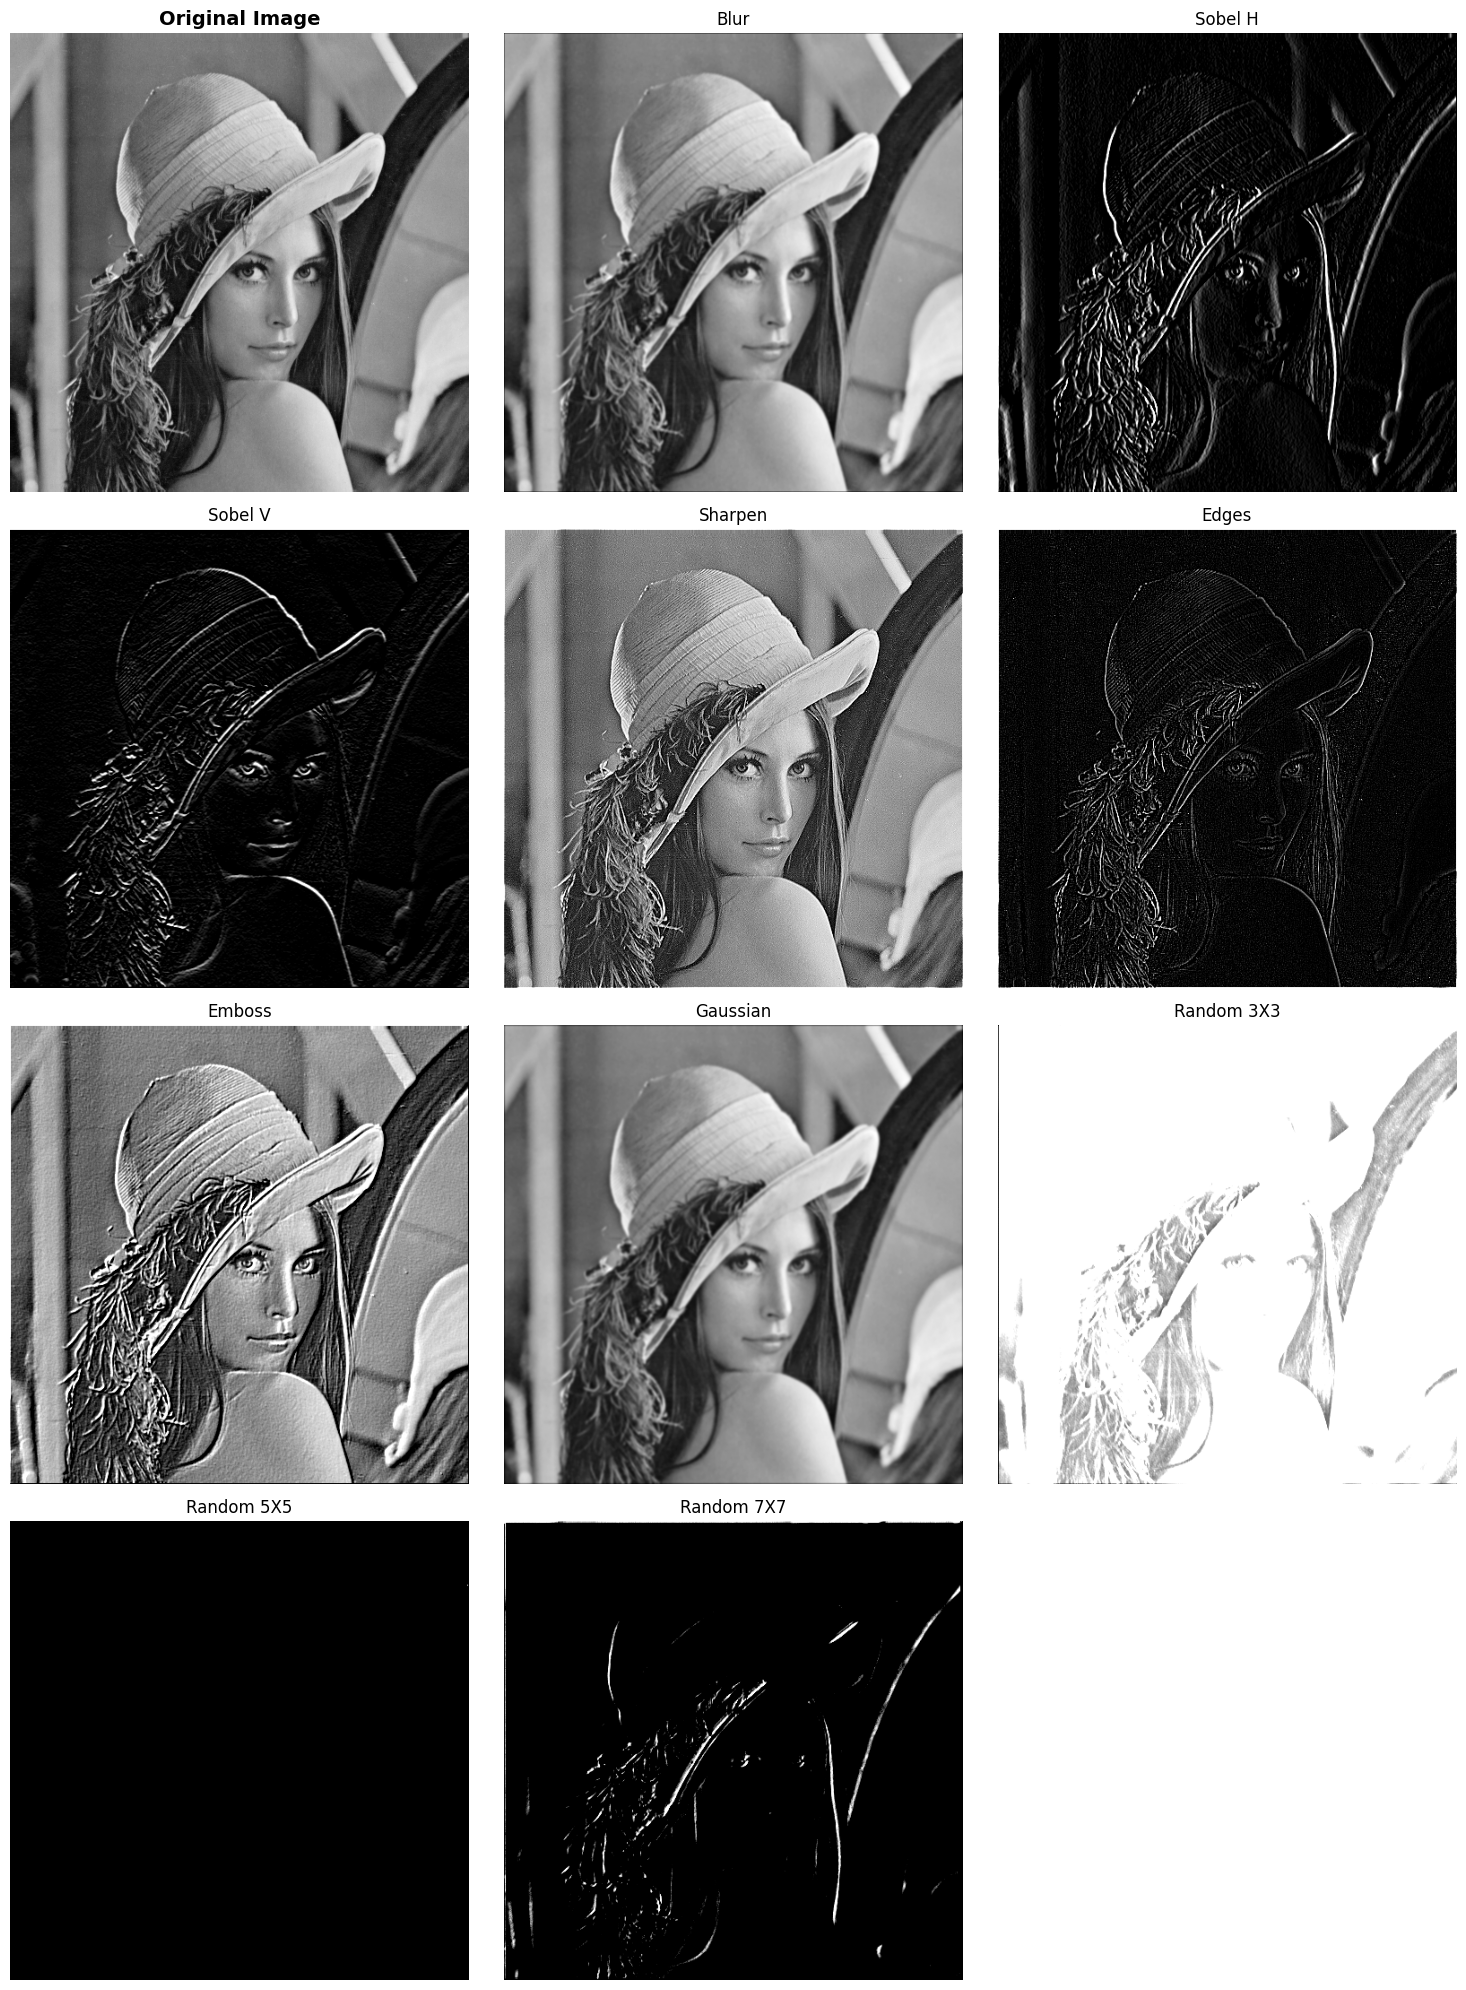



2. Processing as RGB:
Processing RGB image...
Image size: (512, 512)
Tensor shape: torch.Size([1, 3, 512, 512])
Applying blur filter...
Applying sobel_h filter...
Applying sobel_v filter...
Applying sharpen filter...
Applying edges filter...
Applying emboss filter...
Applying gaussian filter...
Applying random_3x3 filter...
Applying random_5x5 filter...
Applying random_7x7 filter...


/tmp/ipython-input-3968601887.py:106: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return Image.fromarray((array * 255).astype(np.uint8), mode='RGB')


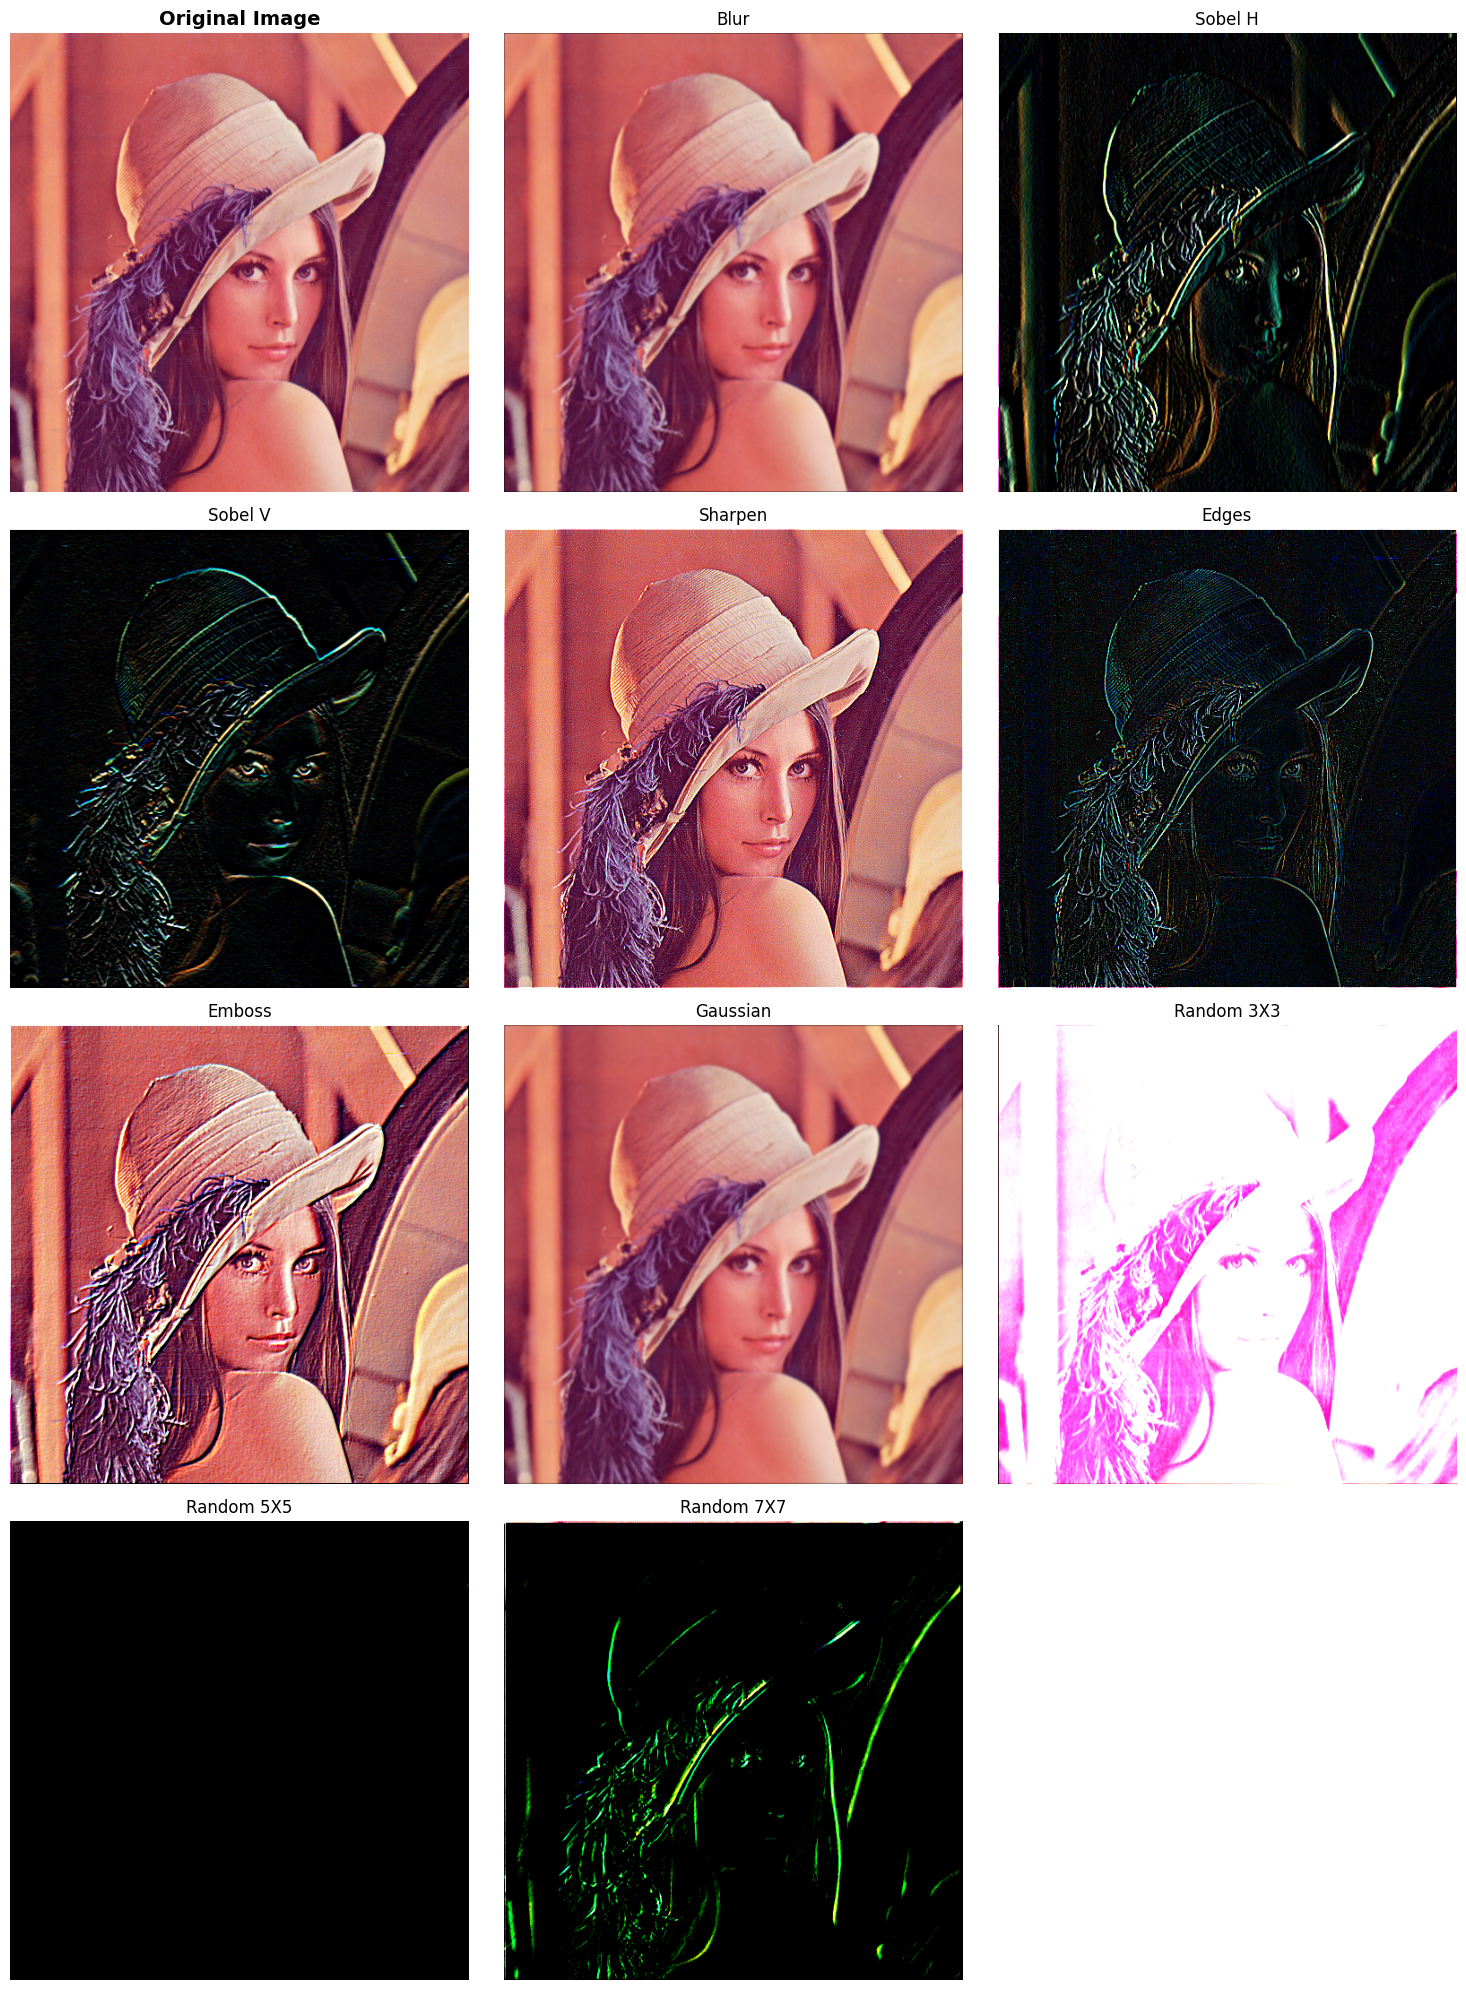

Images saved to output_grayscale/ directory
Images saved to output_rgb/ directory

=== Demo Complete! ===

Filter Kernels Used:

BLUR:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

SOBEL_H:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

SOBEL_V:
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]

SHARPEN:
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]

EDGES:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]

EMBOSS:
[[-2 -1  0]
 [-1  1  1]
 [ 0  1  2]]

GAUSSIAN:
[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]

RANDOM_3X3:
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]]

RANDOM_5X5:
[[ 0.54256004 -0.46341769 -0.46572975  0.24196227 -1.91328024]
 [-1.72491783 -

In [2]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO

def load_image(image_path, grayscale=False):
    """Load image from path or URL"""
    if image_path.startswith('http'):
        try:
            headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'}
            response = requests.get(image_path, headers=headers, timeout=10)
            response.raise_for_status()
            image = Image.open(BytesIO(response.content))
        except Exception as e:
            print(f"Error loading image from URL: {e}")
            print("Creating a sample image instead...")
            # Create a sample image if URL fails
            if grayscale:
                image = create_sample_image(grayscale=True)
            else:
                image = create_sample_image(grayscale=False)
    else:
        try:
            image = Image.open(image_path)
        except Exception as e:
            print(f"Error loading local image: {e}")
            print("Creating a sample image instead...")
            if grayscale:
                image = create_sample_image(grayscale=True)
            else:
                image = create_sample_image(grayscale=False)

    if grayscale:
        image = image.convert('L')
    else:
        image = image.convert('RGB')

    return image

def create_sample_image(grayscale=False, size=(256, 256)):
    """Create a sample image for testing"""
    if grayscale:
        # Create a simple gradient pattern
        data = np.zeros(size, dtype=np.uint8)
        for i in range(size[0]):
            for j in range(size[1]):
                data[i, j] = int(255 * (i + j) / (size[0] + size[1]))

        # Add some shapes
        center_y, center_x = size[0] // 2, size[1] // 2
        y, x = np.ogrid[:size[0], :size[1]]
        mask = (x - center_x) ** 2 + (y - center_y) ** 2 <= (size[0] // 4) ** 2
        data[mask] = 200

        return Image.fromarray(data, mode='L')
    else:
        # Create a colorful sample image
        data = np.zeros((*size, 3), dtype=np.uint8)
        for i in range(size[0]):
            for j in range(size[1]):
                data[i, j, 0] = int(255 * i / size[0])  # Red gradient
                data[i, j, 1] = int(255 * j / size[1])  # Green gradient
                data[i, j, 2] = int(255 * (i + j) / (size[0] + size[1]))  # Blue gradient

        # Add a white circle
        center_y, center_x = size[0] // 2, size[1] // 2
        y, x = np.ogrid[:size[0], :size[1]]
        mask = (x - center_x) ** 2 + (y - center_y) ** 2 <= (size[0] // 6) ** 2
        data[mask] = [255, 255, 255]

        return Image.fromarray(data, mode='RGB')

def image_to_tensor(image):
    """Convert PIL image to PyTorch tensor"""
    if image.mode == 'L':  # Grayscale
        transform = transforms.Compose([
            transforms.ToTensor()
        ])
        tensor = transform(image).unsqueeze(0)  # Add batch dimension
    else:  # RGB
        transform = transforms.Compose([
            transforms.ToTensor()
        ])
        tensor = transform(image).unsqueeze(0)  # Add batch dimension

    return tensor

def tensor_to_image(tensor):
    """Convert PyTorch tensor back to PIL image"""
    # Remove batch dimension and convert to numpy
    if tensor.dim() == 4:
        tensor = tensor.squeeze(0)

    # Clamp values to [0, 1] and convert to numpy
    tensor = torch.clamp(tensor, 0, 1)

    if tensor.shape[0] == 1:  # Grayscale
        array = tensor.squeeze(0).detach().numpy()
        return Image.fromarray((array * 255).astype(np.uint8), mode='L')
    else:  # RGB
        array = tensor.permute(1, 2, 0).detach().numpy()
        return Image.fromarray((array * 255).astype(np.uint8), mode='RGB')

def apply_filter(image_tensor, kernel):
    """Apply convolution filter using PyTorch"""
    # Convert kernel to tensor and add batch/channel dimensions
    if isinstance(kernel, np.ndarray):
        kernel = torch.FloatTensor(kernel)

    # Handle different image types
    if image_tensor.shape[1] == 1:  # Grayscale
        kernel = kernel.unsqueeze(0).unsqueeze(0)  # [1, 1, H, W]
        filtered = F.conv2d(image_tensor, kernel, padding='same')
    else:  # RGB - apply to each channel
        kernel = kernel.unsqueeze(0).unsqueeze(0)  # [1, 1, H, W]
        kernel = kernel.repeat(3, 1, 1, 1)  # [3, 1, H, W] for 3 channels
        filtered = F.conv2d(image_tensor, kernel, padding='same', groups=3)

    return filtered

def create_filters():
    """Create common convolution filters"""
    filters = {}

    # Blur filter (Box blur)
    filters['blur'] = np.array([
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9]
    ])

    # Sobel horizontal (edge detection)
    filters['sobel_h'] = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])

    # Sobel vertical (edge detection)
    filters['sobel_v'] = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])

    # Sharpen filter
    filters['sharpen'] = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])

    # Edge detection (Laplacian)
    filters['edges'] = np.array([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
    ])

    # Emboss filter
    filters['emboss'] = np.array([
        [-2, -1, 0],
        [-1, 1, 1],
        [0, 1, 2]
    ])

    # Gaussian blur (5x5)
    filters['gaussian'] = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1]
    ]) / 256

    # Random filters
    np.random.seed(42)  # For reproducibility
    filters['random_3x3'] = np.random.randn(3, 3)
    filters['random_5x5'] = np.random.randn(5, 5)
    filters['random_7x7'] = np.random.randn(7, 7)

    return filters

def display_results(original_image, filtered_images, filter_names):
    """Display original and filtered images"""
    num_filters = len(filtered_images)
    cols = 3
    rows = (num_filters + cols) // cols

    plt.figure(figsize=(15, 5 * rows))

    # Original image
    plt.subplot(rows, cols, 1)
    plt.imshow(original_image, cmap='gray' if original_image.mode == 'L' else None)
    plt.title('Original Image', fontsize=14, fontweight='bold')
    plt.axis('off')

    # Filtered images
    for i, (filtered_img, filter_name) in enumerate(zip(filtered_images, filter_names)):
        plt.subplot(rows, cols, i + 2)
        plt.imshow(filtered_img, cmap='gray' if filtered_img.mode == 'L' else None)
        plt.title(f'{filter_name.replace("_", " ").title()}', fontsize=12)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def process_image(image_path, grayscale=False):
    """Complete pipeline to process an image with all filters"""
    print(f"Processing {'grayscale' if grayscale else 'RGB'} image...")

    # Load image
    original_image = load_image(image_path, grayscale)
    print(f"Image size: {original_image.size}")

    # Convert to tensor
    image_tensor = image_to_tensor(original_image)
    print(f"Tensor shape: {image_tensor.shape}")

    # Create filters
    filters = create_filters()

    # Apply all filters
    filtered_images = []
    filter_names = []

    for filter_name, kernel in filters.items():
        print(f"Applying {filter_name} filter...")
        filtered_tensor = apply_filter(image_tensor, kernel)
        filtered_image = tensor_to_image(filtered_tensor)

        filtered_images.append(filtered_image)
        filter_names.append(filter_name)

    # Display results
    display_results(original_image, filtered_images, filter_names)

    return original_image, filtered_images, filter_names

def save_results(original_image, filtered_images, filter_names, output_dir='output'):
    """Save filtered images"""
    import os
    os.makedirs(output_dir, exist_ok=True)

    # Save original
    original_image.save(f'{output_dir}/original.jpg')

    # Save filtered images
    for filtered_img, filter_name in zip(filtered_images, filter_names):
        filtered_img.save(f'{output_dir}/{filter_name}.jpg')

    print(f"Images saved to {output_dir}/ directory")

# Example usage
if __name__ == "__main__":
    print("=== PyTorch Convolution Filters Demo ===\n")

    # Test with different image sources
    test_images = [
        # Try direct image URLs first
        "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png",
        "https://homepages.cae.wisc.edu/~ece533/images/lena.png",
        # If URLs fail, will create sample images
        "sample_image"
    ]

    image_source = None
    for img_url in test_images:
        try:
            print(f"Trying to load image from: {img_url}")
            test_img = load_image(img_url, grayscale=True)
            image_source = img_url
            print("✓ Successfully loaded image!")
            break
        except Exception as e:
            print(f"✗ Failed: {e}")
            continue

    # If all URLs fail, use sample image
    if image_source is None:
        print("Using generated sample image...")
        image_source = "sample_image"

    # Process as grayscale
    print("\n1. Processing as GRAYSCALE:")
    original_gray, filtered_gray, names = process_image(image_source, grayscale=True)

    print("\n" + "="*50 + "\n")

    # Process as RGB
    print("2. Processing as RGB:")
    original_rgb, filtered_rgb, names = process_image(image_source, grayscale=False)

    # Save results
    save_results(original_gray, filtered_gray, names, 'output_grayscale')
    save_results(original_rgb, filtered_rgb, names, 'output_rgb')

    print("\n=== Demo Complete! ===")

    # Show filter kernels
    filters = create_filters()
    print("\nFilter Kernels Used:")
    for name, kernel in filters.items():
        if kernel.size <= 25:  # Only show smaller kernels
            print(f"\n{name.upper()}:")
            print(kernel)

# Quick demo function for single filter
def quick_demo(image_path, filter_name='blur'):
    """Quick demo with single filter"""
    filters = create_filters()

    if filter_name not in filters:
        print(f"Available filters: {list(filters.keys())}")
        return

    # Load and process
    image = load_image(image_path)
    tensor = image_to_tensor(image)
    filtered_tensor = apply_filter(tensor, filters[filter_name])
    filtered_image = tensor_to_image(filtered_tensor)

    # Display
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray' if image.mode == 'L' else None)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray' if filtered_image.mode == 'L' else None)
    plt.title(f'{filter_name.title()} Filter')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return image, filtered_image

# Usage examples:
# process_image('your_image.jpg', grayscale=True)
# quick_demo('your_image.jpg', 'sobel_h')